<h1>중간고사 실기 시험 1</h1>

In [56]:
import warnings

warnings.filterwarnings('ignore')

In [57]:
import pandas as pd
import numpy as np

In [58]:
dataset = pd.read_csv("C:/ai_dataset/501.csv")

In [59]:
dataset

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,42:03.8,-0.999023,-0.063477,0.140625,-0.980469,-0.112061,-0.048096,6
1,42:03.9,-0.980225,-0.079346,0.140625,-0.961182,-0.121582,-0.051758,6
2,42:03.9,-0.950195,-0.076416,0.140625,-0.949463,-0.080566,-0.067139,6
3,42:03.9,-0.954834,-0.059082,0.140381,-0.957520,-0.046143,-0.050781,6
4,42:03.9,-0.972412,-0.042969,0.142822,-0.977051,-0.023682,-0.026611,6
...,...,...,...,...,...,...,...,...
103855,17:06.0,-0.760010,-0.068848,-0.203125,-0.796875,-0.007812,-0.036865,6
103856,17:06.0,-0.736328,-0.068115,-0.203125,-0.769287,0.037354,-0.056641,6
103857,17:06.0,-0.736328,-0.079834,-0.203125,-0.763672,0.052490,-0.027588,6
103858,17:06.0,-0.762207,-0.078125,-0.205078,-0.763428,0.042236,0.022705,6


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in dataset.columns :
    dataset[i] = le.fit_transform(dataset[i])

In [61]:
dataset

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,10235,3358,2077,3915,5911,3102,5982,4
1,10236,3435,2012,3915,5990,3063,5967,4
2,10236,3558,2024,3915,6038,3231,5904,4
3,10236,3539,2095,3914,6005,3372,5971,4
4,10236,3467,2161,3923,5925,3464,6070,4
...,...,...,...,...,...,...,...,...
103855,10233,4337,2055,2513,6663,3529,6028,4
103856,10233,4434,2058,2513,6776,3714,5947,4
103857,10233,4434,2010,2513,6799,3776,6066,4
103858,10233,4328,2017,2505,6800,3734,6272,4


In [62]:
sample_data = dataset.sample(frac=0.05)

In [63]:
sample_data

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
79398,5339,4111,2480,2704,5926,3273,6097,0
75831,4626,1942,1062,1236,8882,3244,7296,0
62720,2004,5140,1704,2072,7500,3864,7442,0
27972,15833,3510,2209,4284,9990,3305,1938,5
61297,1719,4798,1667,2384,8314,3691,7356,0
...,...,...,...,...,...,...,...,...
13518,12940,3653,1569,2947,6596,3063,3373,0
89062,7272,4378,1634,2642,8482,3213,7366,0
70165,3493,4532,2485,2191,6165,2987,5273,0
41617,18563,1163,420,1962,2002,2113,4157,0


In [64]:
dataset.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Label')

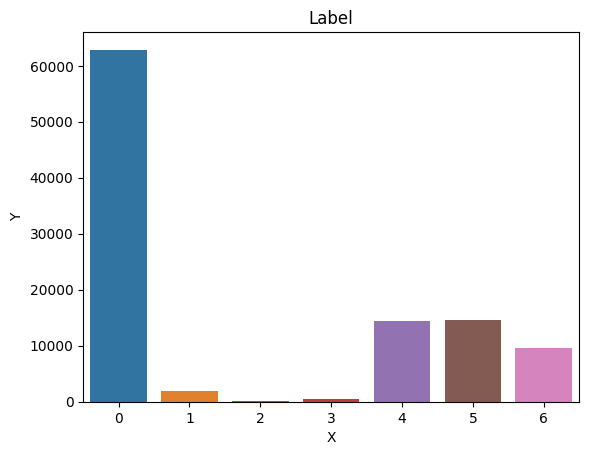

In [66]:
sns.countplot(data = dataset, x="label")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Label")

In [67]:
X = sample_data.iloc[:,0:7].values
y = sample_data['label']

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(40,input_shape=(7,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.00048), 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 40)                320       
                                                                 
 dense_37 (Dense)            (None, 20)                820       
                                                                 
 dense_38 (Dense)            (None, 10)                210       
                                                                 
 dense_39 (Dense)            (None, 7)                 77        
                                                                 
Total params: 1,427
Trainable params: 1,427
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
130/130 [==============================] - 1s 5ms/step - loss: 225.6098 - accuracy: 0.6240 - val_loss: 39.2595 - val_accuracy: 0.7969
Epoch 2/100
130/130 [==============================] - 0s 3ms/step - loss: 26.1896 - accuracy: 0.8154 - val_loss: 22.9625 - val_accuracy: 0.8556
Epoch 3/100
130/130 [==============================] - 0s 3ms/step - loss: 17.6158 - accuracy: 0.8558 - val_loss: 17.5126 - val_accuracy: 0.8720
Epoch 4/100
130/130 [==============================] - 0s 3ms/step - loss: 13.4047 - accuracy: 0.8731 - val_loss: 11.8112 - val_accuracy: 0.8855
Epoch 5/100
130/130 [==============================] - 0s 3ms/step - loss: 10.4425 - accuracy: 0.8825 - val_loss: 10.1826 - val_accuracy: 0.8691
Epoch 6/100
130/130 [==============================] - 0s 3ms/step - loss: 8.0328 - accuracy: 0.9037 - val_loss: 8.0326 - val_accuracy: 0.9076
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 7.2435 - accuracy: 0.8958 - val_loss: 8.3374 - val_accur

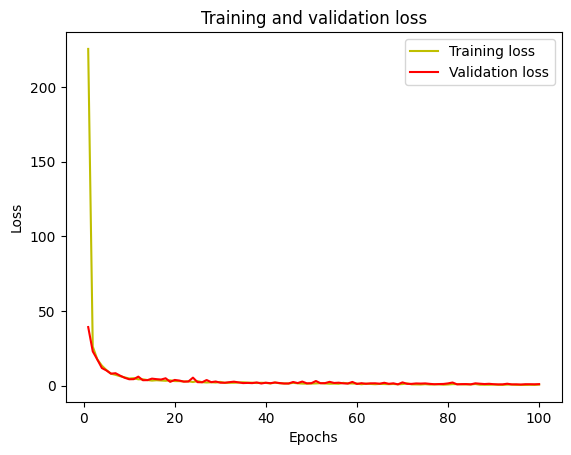

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

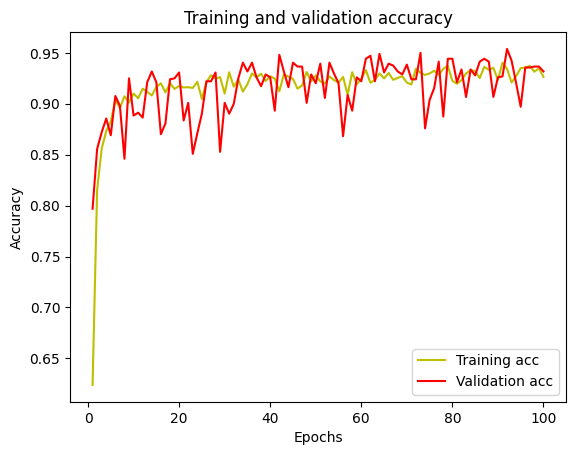

In [71]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()